In [1]:
# Pandas library for the pandas dataframes
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.stats as stats
import scipy



# Import Scikit-Learn library for decision tree models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn import metrics
from sklearn.utils import resample
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Modles
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#One Hot Encoding & Column Transform
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from matplotlib import pyplot as plt

from tqdm import tqdm

import os
import joblib

In [2]:
df = pd.read_csv('../dataset/hao/diameter_only.csv')
df

,in_source,in_amount_mmol,p_source,p_amount_mmol,sol,sol_amount_ml,TOP,TOP_amount_mmol,acid,acid_amount_mmol,...,thiol,thiol_amount_mmol,zinc,zinc_amount_mmol,other,other_amount_mmol,total_volume_ml,temp_c,time_min,diameter_nm
0,indium myristate,0.10,tris(trimethylsilyl)phosphine,0.10,octadecene,8.0,None,0.000000,None,0.0,...,dodecanethiol,0.05,zinc stearate,0.1,None,0.000000,8.012,300,30.0,2.30
1,indium chloride,10.00,sodium phosphide,10.00,4-ethylpyridine,50.0,trioctylphosphine,44.841900,None,0.0,...,None,0.00,None,0.0,None,0.000000,70.000,130,2880.0,5.00
2,"indium tris(N,N-diisopropylacetamidinato)",0.90,tris(trimethylsilyl)phosphine,0.15,mesitylene,5.0,None,0.000000,palmitic acid,0.3,...,None,0.00,None,0.0,None,0.000000,5.077,150,1260.0,2.00
3,"indium tris(N,N-diisopropylacetamidinato)",0.90,tris(trimethylsilyl)phosphine,0.15,mesitylene,5.0,None,0.000000,palmitic acid,0.3,...,None,0.00,None,0.0,None,0.000000,5.077,230,1260.0,4.10
4,indium chloride,0.30,tris(dimethylamino)phosphine,0.08,None,0.0,None,0.000000,None,0.0,...,None,0.00,zinc chloride,2.2,water,1.200000,5.002,180,15.0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,indium oxalate,2.33,tris(trimethylsilyl)phosphine,3.00,None,0.0,trioctylphosphine,24.552424,None,0.0,...,None,0.00,None,0.0,trioctylphosphine oxide,1.011111,11.962,290,4320.0,4.80
67,indium oxalate,2.33,tris(trimethylsilyl)phosphine,3.00,None,0.0,trioctylphosphine,24.552424,None,0.0,...,None,0.00,None,0.0,trioctylphosphine oxide,1.011111,11.962,300,4320.0,6.00
68,indium chloride,2.26,tris(trimethylsilyl)phosphine,2.00,None,0.0,trioctylphosphine,17.936760,None,0.0,...,None,0.00,None,0.0,trioctylphosphine oxide,0.830000,8.830,270,1140.0,5.00
69,indium chloride,0.10,tris(trimethylsilyl)phosphine,0.10,None,0.0,trioctylphosphine,11.210475,None,0.0,...,None,0.00,zinc oleate,2.0,None,0.000000,5.000,280,60.0,2.30


In [3]:
#Checks if there are any columns with no values
df.isna().sum()

in_source            0
in_amount_mmol       0
p_source             0
p_amount_mmol        0
sol                  0
sol_amount_ml        0
TOP                  0
TOP_amount_mmol      0
acid                 0
acid_amount_mmol     0
amine                0
amine_amount_mmol    0
thiol                0
thiol_amount_mmol    0
zinc                 0
zinc_amount_mmol     0
other                0
other_amount_mmol    0
total_volume_ml      0
temp_c               0
time_min             0
diameter_nm          0
dtype: int64

In [4]:
#Separate out initial DataFrame into the input features and output features

df_input = df.drop(columns =['diameter_nm'], inplace = False, axis = 1) 
df_output = df['diameter_nm'].to_frame()


In [5]:
df_input.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   in_source          71 non-null     object 
 1   in_amount_mmol     71 non-null     float64
 2   p_source           71 non-null     object 
 3   p_amount_mmol      71 non-null     float64
 4   sol                71 non-null     object 
 5   sol_amount_ml      71 non-null     float64
 6   TOP                71 non-null     object 
 7   TOP_amount_mmol    71 non-null     float64
 8   acid               71 non-null     object 
 9   acid_amount_mmol   71 non-null     float64
 10  amine              71 non-null     object 
 11  amine_amount_mmol  71 non-null     float64
 12  thiol              71 non-null     object 
 13  thiol_amount_mmol  71 non-null     float64
 14  zinc               71 non-null     object 
 15  zinc_amount_mmol   71 non-null     float64
 16  other              71 non-nu

In [6]:
#Converts the values in the "temp_c" column into float types
df_input['temp_c'] = df_input['temp_c'].astype(float)

df_input.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   in_source          71 non-null     object 
 1   in_amount_mmol     71 non-null     float64
 2   p_source           71 non-null     object 
 3   p_amount_mmol      71 non-null     float64
 4   sol                71 non-null     object 
 5   sol_amount_ml      71 non-null     float64
 6   TOP                71 non-null     object 
 7   TOP_amount_mmol    71 non-null     float64
 8   acid               71 non-null     object 
 9   acid_amount_mmol   71 non-null     float64
 10  amine              71 non-null     object 
 11  amine_amount_mmol  71 non-null     float64
 12  thiol              71 non-null     object 
 13  thiol_amount_mmol  71 non-null     float64
 14  zinc               71 non-null     object 
 15  zinc_amount_mmol   71 non-null     float64
 16  other              71 non-nu

In [7]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diameter_nm  71 non-null     float64
dtypes: float64(1)
memory usage: 696.0 bytes


In [8]:
#Initializes 2 lists to contain all of the numerical and categorical input columns
input_num_cols = [col for col in df_input.columns if df[col].dtypes !='O']
input_cat_cols = [col for col in df_input.columns if df[col].dtypes =='O']
input_cat_cols

['in_source',
 'p_source',
 'sol',
 'TOP',
 'acid',
 'amine',
 'thiol',
 'zinc',
 'other']

In [9]:
#Initializes the ColumnTransformer object, and specifies what it will do with a passed in dataframe
ct = ColumnTransformer([
    ('step1', StandardScaler(), input_num_cols),
    ('step2', OneHotEncoder(sparse=False, handle_unknown='ignore'), input_cat_cols)
], remainder = 'passthrough')

In [10]:
#Uses the ColumnTransformer object to modify the input columns
df_input_scaled_encoded = pd.DataFrame(ct.fit_transform(df_input))
df_input_scaled_encoded

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.670594,-0.880716,0.028488,-0.498168,-0.326407,-0.606822,8.366600,-0.506654,-0.419933,-0.176683,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.164180,5.816477,2.500872,4.453250,-0.326407,-0.606822,-0.119523,-0.614002,-0.419933,3.296294,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.118289,-0.846891,-0.148111,-0.498168,-0.223954,-0.560771,-0.119523,-0.614002,-0.419933,-0.341122,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.118289,-0.846891,-0.148111,-0.498168,-0.223954,-0.560771,-0.119523,-0.614002,-0.419933,-0.341122,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.532517,-0.894245,-0.442442,-0.498168,-0.326407,1.726461,-0.119523,1.747661,0.466107,-0.345324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.868957,1.081088,-0.442442,2.212897,-0.326407,-0.606822,-0.119523,-0.614002,0.326638,0.044622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67,0.868957,1.081088,-0.442442,2.212897,-0.326407,-0.606822,-0.119523,-0.614002,0.326638,0.044622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
68,0.820630,0.404604,-0.442442,1.482399,-0.326407,-0.606822,-0.119523,-0.614002,0.192911,-0.130854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
69,-0.670594,-0.880716,-0.442442,0.739686,-0.326407,-0.606822,-0.119523,1.532965,-0.419933,-0.345436,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#Now that we have transformed all of the relevant columns, how can we take back all of the relevant column names

ct.transformers_

[('step1',
  StandardScaler(),
  ['in_amount_mmol',
   'p_amount_mmol',
   'sol_amount_ml',
   'TOP_amount_mmol',
   'acid_amount_mmol',
   'amine_amount_mmol',
   'thiol_amount_mmol',
   'zinc_amount_mmol',
   'other_amount_mmol',
   'total_volume_ml',
   'temp_c',
   'time_min']),
 ('step2',
  OneHotEncoder(handle_unknown='ignore', sparse=False),
  ['in_source',
   'p_source',
   'sol',
   'TOP',
   'acid',
   'amine',
   'thiol',
   'zinc',
   'other'])]

In [12]:
#Look into ct object to see the column titles
array_of_cat_titles = ct.transformers_[1][1].get_feature_names()
len(array_of_cat_titles)

52

In [13]:
#Number of numerical columns in the dataset
len(input_num_cols)

12

In [14]:
for i in range(len(input_num_cols)):
    df_input_scaled_encoded.rename(columns={df_input_scaled_encoded.columns[i]: input_num_cols[i]}, inplace = True)

for j in range(len(array_of_cat_titles)):
    df_input_scaled_encoded.rename(columns={df_input_scaled_encoded.columns[i+1]: array_of_cat_titles[j]}, inplace = True)
    i = i + 1

In [15]:
df_input_scaled_encoded

,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,thiol_amount_mmol,zinc_amount_mmol,other_amount_mmol,total_volume_ml,...,x7_zinc stearate,x7_zinc undecylenate,x8_None,x8_copper bromide,x8_dioctyl ether,x8_oleic acid,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide
0,-0.670594,-0.880716,0.028488,-0.498168,-0.326407,-0.606822,8.366600,-0.506654,-0.419933,-0.176683,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.164180,5.816477,2.500872,4.453250,-0.326407,-0.606822,-0.119523,-0.614002,-0.419933,3.296294,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.118289,-0.846891,-0.148111,-0.498168,-0.223954,-0.560771,-0.119523,-0.614002,-0.419933,-0.341122,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.118289,-0.846891,-0.148111,-0.498168,-0.223954,-0.560771,-0.119523,-0.614002,-0.419933,-0.341122,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.532517,-0.894245,-0.442442,-0.498168,-0.326407,1.726461,-0.119523,1.747661,0.466107,-0.345324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.868957,1.081088,-0.442442,2.212897,-0.326407,-0.606822,-0.119523,-0.614002,0.326638,0.044622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67,0.868957,1.081088,-0.442442,2.212897,-0.326407,-0.606822,-0.119523,-0.614002,0.326638,0.044622,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
68,0.820630,0.404604,-0.442442,1.482399,-0.326407,-0.606822,-0.119523,-0.614002,0.192911,-0.130854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
69,-0.670594,-0.880716,-0.442442,0.739686,-0.326407,-0.606822,-0.119523,1.532965,-0.419933,-0.345436,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_scaled_encoded = pd.concat([df_input_scaled_encoded, df_output], axis = 1)
df_scaled_encoded

,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,thiol_amount_mmol,zinc_amount_mmol,other_amount_mmol,total_volume_ml,...,x7_zinc undecylenate,x8_None,x8_copper bromide,x8_dioctyl ether,x8_oleic acid,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide,diameter_nm
0,-0.670594,-0.880716,0.028488,-0.498168,-0.326407,-0.606822,8.366600,-0.506654,-0.419933,-0.176683,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.30
1,6.164180,5.816477,2.500872,4.453250,-0.326407,-0.606822,-0.119523,-0.614002,-0.419933,3.296294,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00
2,-0.118289,-0.846891,-0.148111,-0.498168,-0.223954,-0.560771,-0.119523,-0.614002,-0.419933,-0.341122,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00
3,-0.118289,-0.846891,-0.148111,-0.498168,-0.223954,-0.560771,-0.119523,-0.614002,-0.419933,-0.341122,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.10
4,-0.532517,-0.894245,-0.442442,-0.498168,-0.326407,1.726461,-0.119523,1.747661,0.466107,-0.345324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.868957,1.081088,-0.442442,2.212897,-0.326407,-0.606822,-0.119523,-0.614002,0.326638,0.044622,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.80
67,0.868957,1.081088,-0.442442,2.212897,-0.326407,-0.606822,-0.119523,-0.614002,0.326638,0.044622,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.00
68,0.820630,0.404604,-0.442442,1.482399,-0.326407,-0.606822,-0.119523,-0.614002,0.192911,-0.130854,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.00
69,-0.670594,-0.880716,-0.442442,0.739686,-0.326407,-0.606822,-0.119523,1.532965,-0.419933,-0.345436,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.30


In [17]:
df_scaled_encoded.to_csv('InP_hao_diameter_only_scaled.csv')

PermissionError: [Errno 13] Permission denied: 'InP_hao_diameter_only_scaled.csv'

In [18]:
df_scaled_encoded

,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,thiol_amount_mmol,zinc_amount_mmol,other_amount_mmol,total_volume_ml,...,x7_zinc undecylenate,x8_None,x8_copper bromide,x8_dioctyl ether,x8_oleic acid,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide,diameter_nm
0,-0.670594,-0.880716,0.028488,-0.498168,-0.326407,-0.606822,8.366600,-0.506654,-0.419933,-0.176683,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.30
1,6.164180,5.816477,2.500872,4.453250,-0.326407,-0.606822,-0.119523,-0.614002,-0.419933,3.296294,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00
2,-0.118289,-0.846891,-0.148111,-0.498168,-0.223954,-0.560771,-0.119523,-0.614002,-0.419933,-0.341122,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00
3,-0.118289,-0.846891,-0.148111,-0.498168,-0.223954,-0.560771,-0.119523,-0.614002,-0.419933,-0.341122,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.10
4,-0.532517,-0.894245,-0.442442,-0.498168,-0.326407,1.726461,-0.119523,1.747661,0.466107,-0.345324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.868957,1.081088,-0.442442,2.212897,-0.326407,-0.606822,-0.119523,-0.614002,0.326638,0.044622,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.80
67,0.868957,1.081088,-0.442442,2.212897,-0.326407,-0.606822,-0.119523,-0.614002,0.326638,0.044622,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.00
68,0.820630,0.404604,-0.442442,1.482399,-0.326407,-0.606822,-0.119523,-0.614002,0.192911,-0.130854,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.00
69,-0.670594,-0.880716,-0.442442,0.739686,-0.326407,-0.606822,-0.119523,1.532965,-0.419933,-0.345436,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.30


In [19]:
df_dia = pd.read_csv("InP_hao_diameter_only_scaled.csv")
df_dia

,Unnamed: 0,in_amount_mmol,p_amount_mmol,sol_amount_ml,TOP_amount_mmol,acid_amount_mmol,amine_amount_mmol,thiol_amount_mmol,zinc_amount_mmol,other_amount_mmol,...,x7_zinc undecylenate,x8_None,x8_copper bromide,x8_dioctyl ether,x8_oleic acid,x8_trioctylamine,x8_trioctylphosphine oxide,x8_water,x8_zinc iodide,diameter_nm
0,0,-0.670594,-0.880716,0.028488,-0.498168,-0.326407,-0.606822,8.366600,-0.506654,-0.419933,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.30
1,1,6.164180,5.816477,2.500872,4.453250,-0.326407,-0.606822,-0.119523,-0.614002,-0.419933,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00
2,2,-0.118289,-0.846891,-0.148111,-0.498168,-0.223954,-0.560771,-0.119523,-0.614002,-0.419933,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00
3,3,-0.118289,-0.846891,-0.148111,-0.498168,-0.223954,-0.560771,-0.119523,-0.614002,-0.419933,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.10
4,4,-0.532517,-0.894245,-0.442442,-0.498168,-0.326407,1.726461,-0.119523,1.747661,0.466107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,66,0.868957,1.081088,-0.442442,2.212897,-0.326407,-0.606822,-0.119523,-0.614002,0.326638,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.80
67,67,0.868957,1.081088,-0.442442,2.212897,-0.326407,-0.606822,-0.119523,-0.614002,0.326638,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.00
68,68,0.820630,0.404604,-0.442442,1.482399,-0.326407,-0.606822,-0.119523,-0.614002,0.192911,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.00
69,69,-0.670594,-0.880716,-0.442442,0.739686,-0.326407,-0.606822,-0.119523,1.532965,-0.419933,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.30


In [20]:
input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_chloroindium oxalate',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium myristate',
             'x0_indium oxalate',
             'x0_indium trifluoroacetate',
             'x0_indium tris(N,N-diisopropylacetamidinato)',
             'x1_phosphine gas',
             'x1_phosphorus trichloride',
             'x1_sodium phosphide',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x2_4-ethylpyridine',
             'x2_None',
             'x2_mesitylene',
             'x2_octadecene',
             'x2_toluene',
             'x3_None',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_lauric acid',
             'x4_myristic acid',
             'x4_oleic acid',
             'x4_palmitic acid',
             'x4_stearic acid',
             'x5_None',
             'x5_dioctylamine',
             'x5_dodecylamine',
             'x5_hexadecylamine',
             'x5_octylamine',
             'x5_oleylamine',
             'x6_None',
             'x6_dodecanethiol',
             'x7_None',
             'x7_zinc acetate',
             'x7_zinc chloride',
             'x7_zinc iodide',
             'x7_zinc oleate',
             'x7_zinc stearate',
             'x7_zinc undecylenate',
             'x8_None',
             'x8_copper bromide',
             'x8_dioctyl ether',
             'x8_oleic acid',
             'x8_trioctylamine',
             'x8_trioctylphosphine oxide',
             'x8_water',
             'x8_zinc iodide',
                 ]
output_col = ['diameter_nm']

X = df_dia[input_col]

Y = df_dia[output_col]


In [21]:
# Splitting dataset for training
X_train_dia, X_test_dia, Y_train_dia, Y_test_dia = train_test_split(X, Y, test_size=0.15, random_state=45, shuffle=True)

### 1. Bagging

In [22]:
# This is a grid search for three parameters in the Bagging algorithm. 
# Parameters are: max_depth, n_estimators, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mse = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(5, 80, 5):
            
            B_regr_dia = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=i),
                                      n_estimators=j,
                                      random_state=k)
            
            B_regr_dia.fit(X_train_dia, np.ravel(Y_train_dia))
            
            B_Y_pred_dia = B_regr_dia.predict(X_test_dia)
            
            mse = mean_squared_error(Y_test_dia, B_Y_pred_dia)
            
            if (min_mse > mse):
                min_mse = mse
                min_i = i
                min_j = j
                min_k = k
            
print(min_mse, min_i, min_j, min_k)

100%|██████████| 20/20 [01:52<00:00,  5.64s/it]

0.30924485430453985 4 5 55


Mean squared error = 0.30924


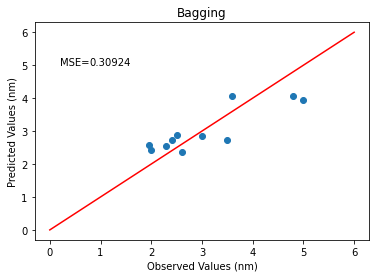

In [23]:
B_regr_dia = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                                      n_estimators=5,
                                      random_state=55)
            
B_regr_dia.fit(X_train_dia, np.ravel(Y_train_dia))
            
B_Y_pred_dia = B_regr_dia.predict(X_test_dia)
            
mse = mean_squared_error(Y_test_dia, B_Y_pred_dia)
print("Mean squared error =", round(mse,5))

plt.figure()
plt.title("Bagging")
plt.plot(Y_test_dia, B_Y_pred_dia, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([0,6],[0,6], color = 'r')
plt.text(0.2, 5, 'MSE=' , fontdict=None)
plt.text(0.79, 5, round(mse,5) , fontdict=None)
plt.show()

### 2. Decision Trees

In [25]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mse = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(5, 80, 5):
            
            DT_regr_dia = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_dia.fit(X_train_dia, Y_train_dia)

            DT_Y_pred_dia = DT_regr_dia.predict(X_test_dia)

            mse = mean_squared_error(Y_test_dia, DT_Y_pred_dia)
            
            if (min_mse > mse):
                min_mse = mse
                min_i = i
                min_j = j
                min_k = k
            
print(min_mse, min_i, min_j, min_k)

100%|██████████| 20/20 [00:28<00:00,  1.44s/it]

0.2840140050085341 5 9 45


Mean squared error = 0.28401


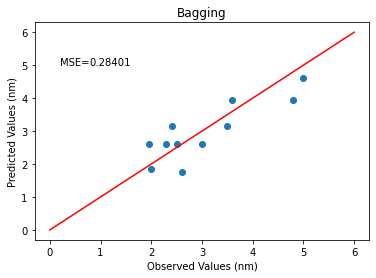

In [26]:
DT_regr_dia = DecisionTreeRegressor(max_depth=5,
                                max_features=9,
                                random_state=45)
            
DT_regr_dia.fit(X_train_dia, np.ravel(Y_train_dia))
            
DT_Y_pred_dia = DT_regr_dia.predict(X_test_dia)
            
mse = mean_squared_error(Y_test_dia, DT_Y_pred_dia)
print("Mean squared error =", round(mse,5))

plt.figure()
plt.title("Bagging")
plt.plot(Y_test_dia, DT_Y_pred_dia, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.plot([0,6],[0,6], color = 'r')
plt.text(0.2, 5, 'MSE=' , fontdict=None)
plt.text(0.79, 5, round(mse,5) , fontdict=None)
plt.show()

### 3. Random Forrests

In [27]:

# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mse = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 50, 2):
            RF_regr_dia = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45
                                                )
            RF_regr_dia.fit(X_train_dia, np.ravel(Y_train_dia))
            RF_Y_pred_dia = RF_regr_dia.predict(X_test_dia)

            mse = mean_squared_error(Y_test_dia, RF_Y_pred_dia)
            if (min_mse > mse):
                min_mse = mse
                min_i = i
                min_j = j
                min_k = k
            
print(min_mse, min_i, min_j, min_k)

100%|██████████| 20/20 [02:17<00:00,  6.86s/it]

0.29076669034090913 13 8 4


### 4. Extra Trees

In [28]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mse = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 50, 2):
            ET_regr_dia = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k
                                                )
            ET_regr_dia.fit(X_train_dia, np.ravel(Y_train_dia))
            ET_Y_pred_dia = ET_regr_dia.predict(X_test_dia)

            mse = mean_squared_error(Y_test_dia, ET_Y_pred_dia)
            if (min_mse > mse):
                min_mse = mse
                min_i = i
                min_j = j
                min_k = k
            
print(min_mse, min_i, min_j, min_k)

100%|██████████| 20/20 [01:50<00:00,  5.54s/it]

0.3462931818181817 2 4 46


### 5. Gradient Boosting

In [30]:
min_mse = 99999
min_i, min_j = 0, 0
for i in tqdm(range(50, 500, 10)):
    for j in range(1, 80):
        GB_regr_dia = GradientBoostingRegressor(n_estimators=i, max_depth=j)
        GB_regr_dia.fit(X_train_dia, np.ravel(Y_train_dia))
        GB_Y_pred_dia = GB_regr_dia.predict(X_test_dia)

        mse = mean_squared_error(Y_test_dia, GB_Y_pred_dia)
        if (min_mse > mse):
            min_mse = mse
            min_i = i
            min_j = j
                        
print(min_mse, min_i, min_j)

100%|██████████| 45/45 [09:33<00:00, 12.74s/it]

0.8277561519092629 80 1


### 6. Other models

In [31]:
REGRESSIONS = {
    "K-nn": KNeighborsRegressor(),                          
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
                }
# mse is used to evaluate the performance of all regressions.


for name, reg in REGRESSIONS.items():     
    reg.fit(X_train_dia, Y_train_dia)                 
    Y_pred_dia = pd.DataFrame(reg.predict(X_test_dia))
    
    print(name)
    
    mse = mean_squared_error(Y_test_dia, Y_pred_dia)
    
    print(' MSE for diameter is ', mse, '\n')

K-nn
 MSE for diameter is  0.5491734545454544 

Linear regression
 MSE for diameter is  12.031179045989921 

Ridge
 MSE for diameter is  0.6937761741468935 

Lasso
 MSE for diameter is  1.056057080808081 

ElasticNet
 MSE for diameter is  1.056057080808081 



## Conclusion
**Decision Trees** gave the least error for the prediction of diameter.